## SETUP

In [1]:
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from math import pi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

import sys, pathlib, os
project_root = pathlib.Path.home() / "projets" / "protein-generation"
sys.path.append(str(project_root))

from scripts.evaluation.evaluate import *


In [2]:
out_dir = '/home/arthur/projets/protein-generation/experiments/metrics/test_classic_mutate_VL_L100'

## QUALITY

In [3]:
quality_files = list(Path(out_dir).glob("*_quality_*.yaml"))
print(f"Found {len(quality_files)} quality result files:")

loaded_quality_results = {}
for file_path in quality_files:
    print(f"Loading: {file_path.name}")
    
    # Extract dataset name from filename
    filename = file_path.stem
    if "training_sequences" in filename:
        dataset_name = "training"
    else:
        # Extract dataset name (e.g., "model_1" from "model_1_sequences_quality_20250715_123456.yaml")
        parts = filename.split("_")
        if len(parts) >= 2:
            dataset_name = "_".join(parts[:-3])  # Remove "_sequences_quality_timestamp"
        else:
            dataset_name = filename.replace("_quality", "")
    
    # Load the results
    quality_results = load_quality_results(str(file_path))
    loaded_quality_results[dataset_name] = quality_results
    
    print(f"Loaded {len(quality_results)} quality results for '{dataset_name}'")


Found 5 quality result files:
Loading: training_sequences_quality_20250721_123015.yaml
Loaded 1000 quality results for 'training'
Loading: variablelength_sequences_quality_20250721_140909.yaml
Loaded 1000 quality results for 'variablelength_sequences'
Loading: mutate_sequences_quality_20250721_130804.yaml
Loaded 1000 quality results for 'mutate_sequences'
Loading: generated_sequences_quality_20250721_124909.yaml
Loaded 1000 quality results for 'generated_sequences'
Loading: trainedVL_sequences_quality_20250722_112600.yaml
Loaded 1000 quality results for 'trainedVL_sequences'


In [4]:
# Prepare data for summary table
summary_data = []
for dataset_name, results in loaded_quality_results.items():
    plddt_values = [r['plddt_mean'] for r in results]
    perplexity_values = [r['perplexity'] for r in results]
    
    summary_data.append({
        'Dataset': dataset_name.replace('_', ' ').title(),
        'N_sequences': len(results),
        'pLDDT_mean': np.mean(plddt_values),
        'pLDDT_std': np.std(plddt_values),
        'pLDDT_median': np.median(plddt_values),
        'pLDDT_min': np.min(plddt_values),
        'pLDDT_max': np.max(plddt_values),
        'Perplexity_mean': np.mean(perplexity_values),
        'Perplexity_std': np.std(perplexity_values),
        'Perplexity_median': np.median(perplexity_values),
        'Perplexity_min': np.min(perplexity_values),
        'Perplexity_max': np.max(perplexity_values)
    })

# Create DataFrame and display
df_summary = pd.DataFrame(summary_data)
df_summary = df_summary.round(3)

print("DETAILED SUMMARY:")
display(df_summary)

# Create a more focused table for quick comparison
print("QUICK COMPARISON TABLE:")
comparison_data = []
for dataset_name, results in loaded_quality_results.items():
    plddt_values = [r['plddt_mean'] for r in results]
    perplexity_values = [r['perplexity'] for r in results]
    
    comparison_data.append({
        'Dataset': dataset_name.replace('_', ' ').title(),
        'N': len(results),
        'pLDDT (mean ± std)': f"{np.mean(plddt_values):.2f} ± {np.std(plddt_values):.2f}",
        'pLDDT (median)': f"{np.median(plddt_values):.2f}",
        'Perplexity (mean ± std)': f"{np.mean(perplexity_values):.2f} ± {np.std(perplexity_values):.2f}",
        'Perplexity (median)': f"{np.median(perplexity_values):.2f}",
        'High pLDDT (>70)': f"{np.sum(np.array(plddt_values) > 70)}/{len(plddt_values)} ({100*np.sum(np.array(plddt_values) > 70)/len(plddt_values):.1f}%)"
    })

df_comparison = pd.DataFrame(comparison_data)
display(df_comparison)


DETAILED SUMMARY:


,Dataset,N_sequences,pLDDT_mean,pLDDT_std,pLDDT_median,pLDDT_min,pLDDT_max,Perplexity_mean,Perplexity_std,Perplexity_median,Perplexity_min,Perplexity_max
0,Training,1000,56.811,13.005,57.485,28.292,82.382,14.155,2.418,14.215,3.465,20.328
1,Variablelength Sequences,1000,38.808,6.696,37.250,27.459,77.099,17.355,1.496,17.574,11.712,21.107
2,Mutate Sequences,1000,48.245,14.027,43.206,25.841,81.027,15.532,2.432,15.615,10.976,21.927
3,Generated Sequences,1000,36.680,5.687,35.580,25.820,79.128,17.831,1.289,17.942,11.970,20.840
4,Trainedvl Sequences,1000,46.832,10.596,44.236,26.414,71.278,12.289,5.286,13.169,3.458,21.327


QUICK COMPARISON TABLE:


,Dataset,N,pLDDT (mean ± std),pLDDT (median),Perplexity (mean ± std),Perplexity (median),High pLDDT (>70)
0,Training,1000,56.81 ± 13.00,57.48,14.15 ± 2.42,14.22,165/1000 (16.5%)
1,Variablelength Sequences,1000,38.81 ± 6.70,37.25,17.35 ± 1.50,17.57,2/1000 (0.2%)
2,Mutate Sequences,1000,48.25 ± 14.03,43.21,15.53 ± 2.43,15.61,73/1000 (7.3%)
3,Generated Sequences,1000,36.68 ± 5.69,35.58,17.83 ± 1.29,17.94,4/1000 (0.4%)
4,Trainedvl Sequences,1000,46.83 ± 10.60,44.24,12.29 ± 5.29,13.17,2/1000 (0.2%)


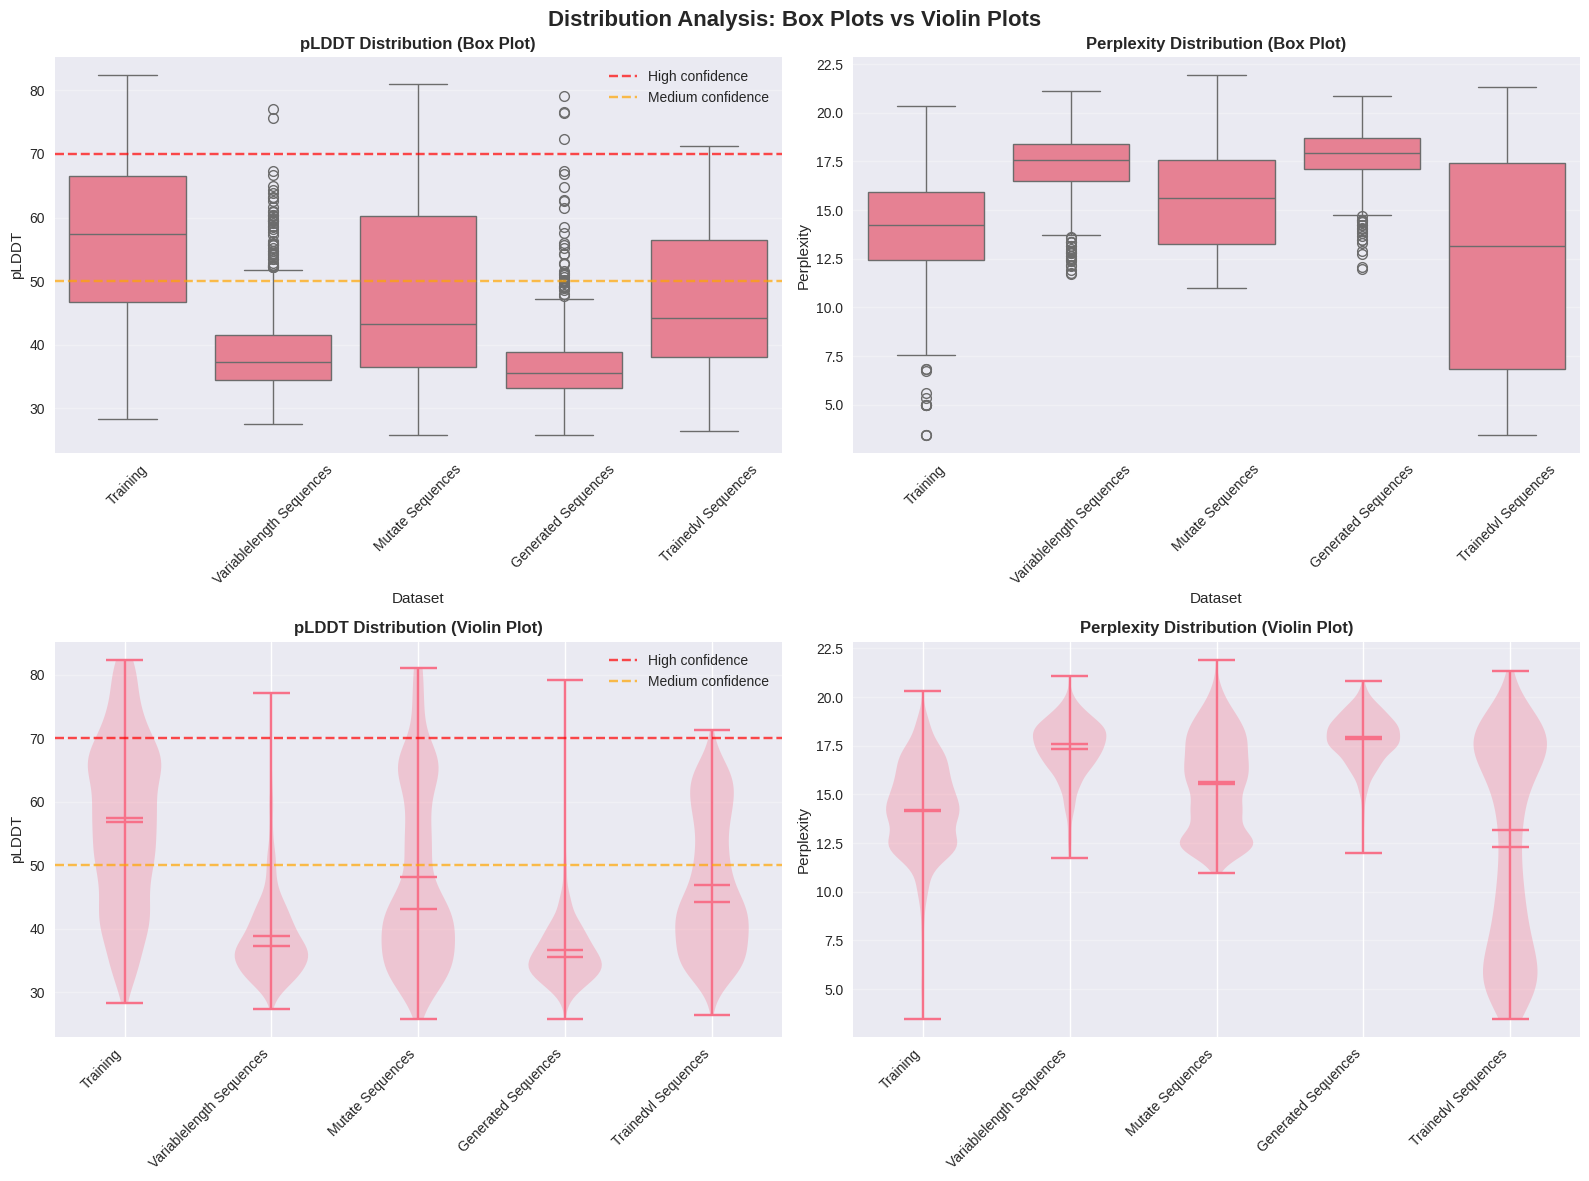

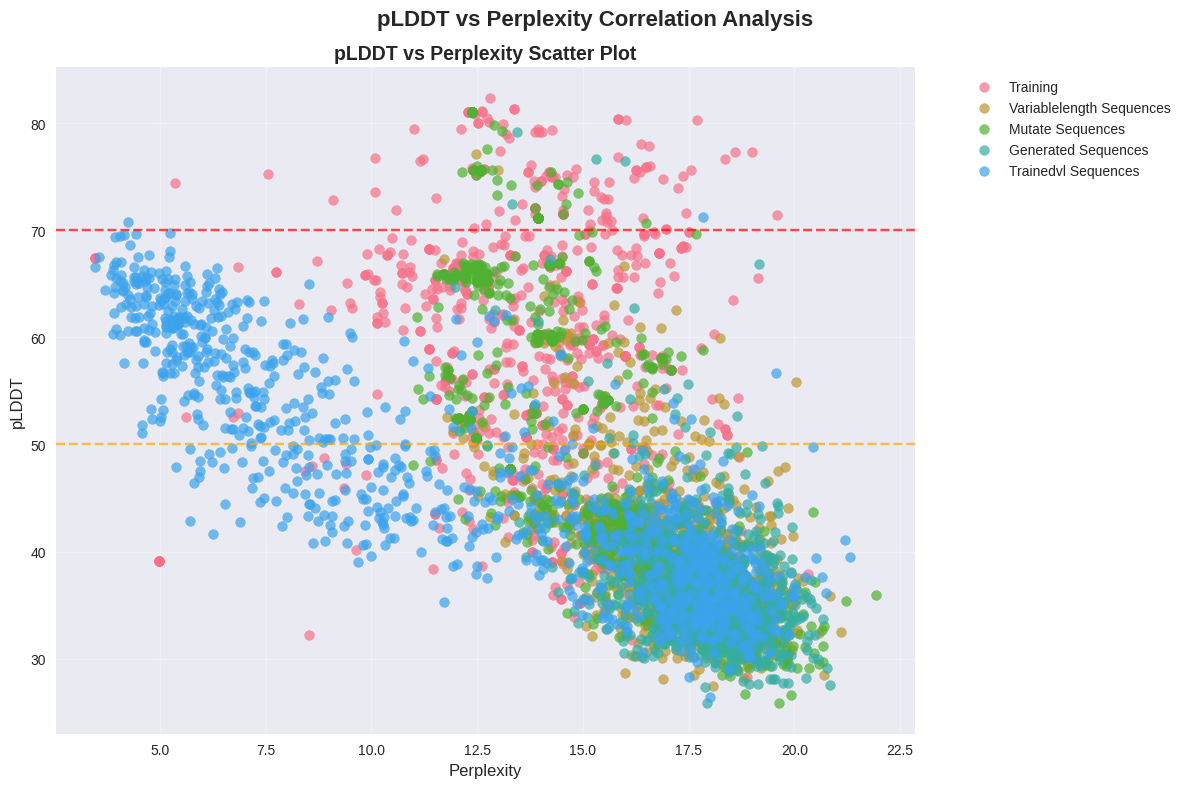

In [5]:
# Prepare data for plotting
plot_data = []
for dataset_name, results in loaded_quality_results.items():
    for result in results:
        plot_data.append({
            'Dataset': dataset_name.replace('_', ' ').title(),
            'pLDDT': result['plddt_mean'],
            'Perplexity': result['perplexity'] 
        })

df_plot = pd.DataFrame(plot_data)



# Create first figure with 2x2 grid for box plots and violin plots
fig1, axes = plt.subplots(2, 2, figsize=(16, 12))
fig1.suptitle('Distribution Analysis: Box Plots vs Violin Plots', fontsize=16, fontweight='bold')

# 1. pLDDT Box Plot (première ligne, première colonne)
ax1 = axes[0, 0]
sns.boxplot(data=df_plot, x='Dataset', y='pLDDT', ax=ax1)
ax1.set_title('pLDDT Distribution (Box Plot)', fontweight='bold')
ax1.set_ylabel('pLDDT')
ax1.tick_params(axis='x', rotation=45)
ax1.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='High confidence')
ax1.axhline(y=50, color='orange', linestyle='--', alpha=0.7, label='Medium confidence')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. Perplexity Box Plot (première ligne, deuxième colonne)
ax2 = axes[0, 1]
sns.boxplot(data=df_plot, x='Dataset', y='Perplexity', ax=ax2)
ax2.set_title('Perplexity Distribution (Box Plot)', fontweight='bold')
ax2.set_ylabel('Perplexity')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. pLDDT Violin Plot (deuxième ligne, première colonne)
ax3 = axes[1, 0]
# Prepare data for violin plot
plddt_data_to_plot = []
plddt_labels = []
for dataset in df_plot['Dataset'].unique():
    data = df_plot[df_plot['Dataset'] == dataset]['pLDDT'].values
    plddt_data_to_plot.append(data)
    plddt_labels.append(dataset)

parts = ax3.violinplot(plddt_data_to_plot, positions=range(1, len(plddt_data_to_plot)+1), showmeans=True, showmedians=True)
ax3.set_xticks(range(1, len(plddt_labels)+1))
ax3.set_xticklabels(plddt_labels, rotation=45, ha='right')
ax3.set_title('pLDDT Distribution (Violin Plot)', fontweight='bold')
ax3.set_ylabel('pLDDT')
ax3.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='High confidence')
ax3.axhline(y=50, color='orange', linestyle='--', alpha=0.7, label='Medium confidence')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Perplexity Violin Plot (deuxième ligne, deuxième colonne)
ax4 = axes[1, 1]
# Prepare data for violin plot
perp_data_to_plot = []
perp_labels = []
for dataset in df_plot['Dataset'].unique():
    data = df_plot[df_plot['Dataset'] == dataset]['Perplexity'].values
    perp_data_to_plot.append(data)
    perp_labels.append(dataset)

parts = ax4.violinplot(perp_data_to_plot, positions=range(1, len(perp_data_to_plot)+1), showmeans=True, showmedians=True)
ax4.set_xticks(range(1, len(perp_labels)+1))
ax4.set_xticklabels(perp_labels, rotation=45, ha='right')
ax4.set_title('Perplexity Distribution (Violin Plot)', fontweight='bold')
ax4.set_ylabel('Perplexity')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Create second figure with large scatter plot
fig2, ax = plt.subplots(1, 1, figsize=(12, 8))
fig2.suptitle('pLDDT vs Perplexity Correlation Analysis', fontsize=16, fontweight='bold')

# Scatter plot with different colors for each dataset
for dataset in df_plot['Dataset'].unique():
    data = df_plot[df_plot['Dataset'] == dataset]
    ax.scatter(data['Perplexity'], data['pLDDT'], alpha=0.7, label=dataset, s=50)

ax.set_xlabel('Perplexity', fontsize=12)
ax.set_ylabel('pLDDT', fontsize=12)
ax.set_title('pLDDT vs Perplexity Scatter Plot', fontweight='bold', fontsize=14)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(alpha=0.3)

# Add reference lines for pLDDT confidence levels
ax.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='High confidence (pLDDT=70)')
ax.axhline(y=50, color='orange', linestyle='--', alpha=0.7, label='Medium confidence (pLDDT=50)')

plt.tight_layout()
plt.show()

In [6]:
# Calculate percentiles and quality categories
for dataset_name, results in loaded_quality_results.items():
    plddt_values = np.array([r['plddt_mean'] for r in results])
    perplexity_values = np.array([r['perplexity'] for r in results])
    
    print(f"{dataset_name.upper().replace('_', ' ')}:")
    print(f"  pLDDT Statistics:")
    print(f"    P25: {np.percentile(plddt_values, 25):.2f}")
    print(f"    P50: {np.percentile(plddt_values, 50):.2f}")
    print(f"    P75: {np.percentile(plddt_values, 75):.2f}")
    print(f"    P90: {np.percentile(plddt_values, 90):.2f}")
    print(f"    P95: {np.percentile(plddt_values, 95):.2f}")
    
    # Quality categories
    high_quality = np.sum(plddt_values > 70)
    medium_quality = np.sum((plddt_values > 50) & (plddt_values <= 70))
    low_quality = np.sum(plddt_values <= 50)
    
    print(f"  Quality Categories:")
    print(f"    High confidence (>70): {high_quality}/{len(plddt_values)} ({100*high_quality/len(plddt_values):.1f}%)")
    print(f"    Medium confidence (50-70): {medium_quality}/{len(plddt_values)} ({100*medium_quality/len(plddt_values):.1f}%)")
    print(f"    Low confidence (≤50): {low_quality}/{len(plddt_values)} ({100*low_quality/len(plddt_values):.1f}%)")
    
    print(f"  Perplexity Statistics:")
    print(f"    P25: {np.percentile(perplexity_values, 25):.2f}")
    print(f"    P50: {np.percentile(perplexity_values, 50):.2f}")
    print(f"    P75: {np.percentile(perplexity_values, 75):.2f}")
    print(f"    P90: {np.percentile(perplexity_values, 90):.2f}")
    print(f"    P95: {np.percentile(perplexity_values, 95):.2f}")

TRAINING:
  pLDDT Statistics:
    P25: 46.74
    P50: 57.48
    P75: 66.58
    P90: 74.03
    P95: 79.14
  Quality Categories:
    High confidence (>70): 165/1000 (16.5%)
    Medium confidence (50-70): 521/1000 (52.1%)
    Low confidence (≤50): 314/1000 (31.4%)
  Perplexity Statistics:
    P25: 12.44
    P50: 14.22
    P75: 15.92
    P90: 17.09
    P95: 17.77
VARIABLELENGTH SEQUENCES:
  pLDDT Statistics:
    P25: 34.40
    P50: 37.25
    P75: 41.46
    P90: 47.14
    P95: 51.81
  Quality Categories:
    High confidence (>70): 2/1000 (0.2%)
    Medium confidence (50-70): 70/1000 (7.0%)
    Low confidence (≤50): 928/1000 (92.8%)
  Perplexity Statistics:
    P25: 16.51
    P50: 17.57
    P75: 18.40
    P90: 19.04
    P95: 19.38
MUTATE SEQUENCES:
  pLDDT Statistics:
    P25: 36.51
    P50: 43.21
    P75: 60.26
    P90: 66.76
    P95: 75.41
  Quality Categories:
    High confidence (>70): 73/1000 (7.3%)
    Medium confidence (50-70): 318/1000 (31.8%)
    Low confidence (≤50): 609/1000 (60.9

## NOVELTY & FIDELITY & DIVERSITY

In [7]:
distribution_files = list(Path(out_dir).glob("*_distribution_*.yaml"))

loaded_distribution_results = {}
for file_path in distribution_files:
    print(f"Loading: {file_path.name}")
    
    # Extract dataset name from filename
    filename = file_path.stem
    # Extract dataset name (e.g., "model_1" from "model_1_vs_training_distribution_20250715_123456.yaml")
    parts = filename.split("_")
    if "vs_training" in filename:
        dataset_name = "_".join(parts[:-3])  # Remove "_vs_training_distribution_timestamp"
    else:
        dataset_name = filename.replace("_distribution", "")
    
    # Load the results
    dist_results = load_distribution_results(str(file_path))
    loaded_distribution_results[dataset_name] = dist_results
    print(f"Loaded {len(dist_results)} distribution results for '{dataset_name}'")

Loading: trainedVL_vs_training_distribution_20250722_112843.yaml
Loaded 10 distribution results for 'trainedVL_vs_training'
Loading: generated_vs_training_distribution_20250721_141140.yaml
Loaded 10 distribution results for 'generated_vs_training'
Loading: mutate_vs_training_distribution_20250721_141246.yaml
Loaded 10 distribution results for 'mutate_vs_training'
Loading: variablelength_vs_training_distribution_20250721_141351.yaml
Loaded 10 distribution results for 'variablelength_vs_training'


### NOVELTY : HAMMING

Hamming Distance Summary Table:
                   Dataset  Mean_Distance  Std_Distance  Min_Distance  Max_Distance  Median_Distance  Q25_Distance  Q75_Distance  N_Sequences
     trainedVL_vs_training         0.3899        0.2655          0.03          0.87             0.31          0.15          0.65         1000
     generated_vs_training         0.7284        0.1436          0.01          0.84             0.78          0.73          0.80         1000
        mutate_vs_training         0.3305        0.3542          0.00          0.87             0.20          0.01          0.80         1000
variablelength_vs_training         0.6846        0.2083          0.01          0.85             0.77          0.71          0.80         1000



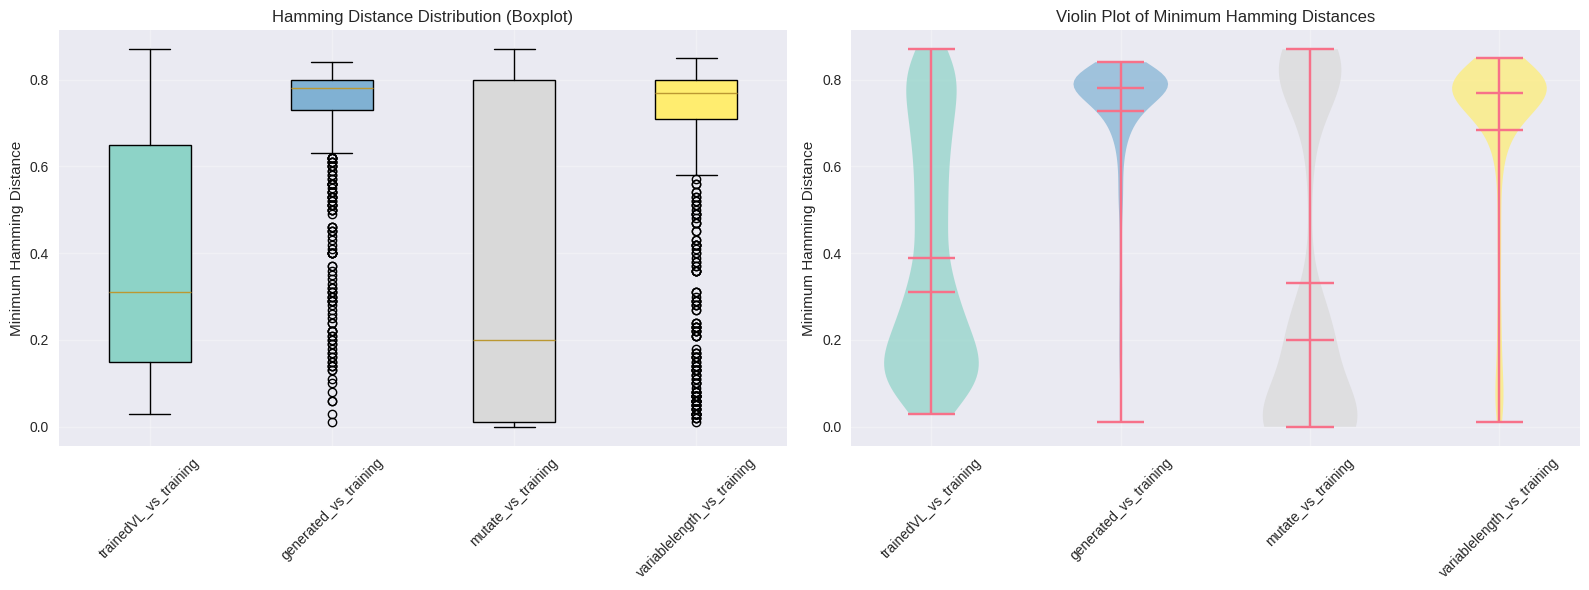

In [8]:
hamming_results = []

for dataset_name, dist_results in loaded_distribution_results.items():
    if 'hamming_distance' in dist_results:
        hamming_data = dist_results['hamming_distance']
        mean_distance = hamming_data['mean']
        individual_distances = hamming_data['individual_distances']
        
        hamming_results.append({
            'Dataset': dataset_name,
            'Mean_Distance': mean_distance,
            'Std_Distance': np.std(individual_distances),
            'Min_Distance': np.min(individual_distances),
            'Max_Distance': np.max(individual_distances),
            'Median_Distance': np.median(individual_distances),
            'Q25_Distance': np.percentile(individual_distances, 25),
            'Q75_Distance': np.percentile(individual_distances, 75),
            'N_Sequences': len(individual_distances),
            'Individual_Distances': individual_distances
        })

# Create summary table
hamming_df = pd.DataFrame(hamming_results)
hamming_summary = hamming_df.drop('Individual_Distances', axis=1)

print("Hamming Distance Summary Table:")
print("=" * 80)
print(hamming_summary.round(4).to_string(index=False))
print()

# Visualization: Boxplot and Violin Plot
if len(hamming_results) > 0:
    # Prepare data for plotting
    data_to_plot = [result['Individual_Distances'] for result in hamming_results]
    labels = [result['Dataset'] for result in hamming_results]
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Boxplot on the left
    bp = ax1.boxplot(data_to_plot, labels=labels, patch_artist=True)
    
    # Color the boxes with different colors
    colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax1.set_ylabel('Minimum Hamming Distance')
    ax1.set_title('Hamming Distance Distribution (Boxplot)')
    ax1.grid(True, alpha=0.3)
    
    # Rotate x-axis labels if too many datasets
    if len(labels) > 3:
        ax1.tick_params(axis='x', rotation=45)
    
    # Violin plot on the right
    parts = ax2.violinplot(
        data_to_plot,
        positions=range(1, len(labels) + 1),
        showmeans=True,
        showmedians=True
    )
    
    # Color the violin plots
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.7)
    
    ax2.set_xticks(range(1, len(labels) + 1))
    ax2.set_xticklabels(labels)
    ax2.set_ylabel('Minimum Hamming Distance')
    ax2.set_title('Violin Plot of Minimum Hamming Distances')
    ax2.grid(True, alpha=0.3)
    
    # Rotate x-axis labels if too many datasets
    if len(labels) > 3:
        ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
   
else:
    print("No hamming distance results found in the loaded data.")

### FIDELITY & DIVERSITY 

In [9]:
metrics_data = []
for dataset_name, results in loaded_distribution_results.items():
    metrics_data.append({
        'Dataset': dataset_name,
        'Hamming Distance': results['hamming_distance']['mean'],
        'Fréchet ESM': results['frechet_esm_distance'],
        'Sliced Wasserstein': results['sliced_wasserstein']['distance'],
        'TopPR Fidelity': results['toppr']['fidelity'],
        'TopPR Diversity': results['toppr']['diversity'],
        'TopPR F1': results['toppr']['f1_score'],
        'KL Gen→Train': results['kde_kl_divergence']['kl_gen_to_train'],
        'KL Train→Gen': results['kde_kl_divergence']['kl_train_to_gen'],
        'KNN Fidelity': results['knn_fidelity']['mean_distance'],
        'KNN Diversity': results['knn_diversity']['mean_distance'],
        'Soft Align Fidelity': results['soft_alignment_fidelity']['mean_distance'],
        'Soft Align Diversity': results['soft_alignment_diversity']['mean_distance']
    })

df_metrics = pd.DataFrame(metrics_data)
df_metrics = df_metrics.set_index('Dataset').T
print(df_metrics.round(4))

Dataset               trainedVL_vs_training  generated_vs_training  \
Hamming Distance                     0.3899                 0.7284   
Fréchet ESM                          5.6494                 1.3591   
Sliced Wasserstein                   1.5329                 0.6119   
TopPR Fidelity                       0.3579                 0.0000   
TopPR Diversity                      0.6290                 0.0000   
TopPR F1                             0.4562                 0.0000   
KL Gen→Train                        64.7924                28.7786   
KL Train→Gen                        63.0897                48.2205   
KNN Fidelity                         4.8244                 5.6278   
KNN Diversity                        5.3427                 5.3850   
Soft Align Fidelity                  0.0000                 0.0000   
Soft Align Diversity                 0.0000                 0.0000   

Dataset               mutate_vs_training  variablelength_vs_training  
Hamming Distance  

In [10]:
distribution_results = loaded_distribution_results

datasets = ['training_vs_training', 
            'generated_vs_training', 
            'mutate_vs_training', 
            'variablelength_vs_training', 
            'trainedVL_vs_training',
            'circular_1_vs_training', 
            'circular_3_vs_training', 
            'circular_5_vs_training', 
            'circular_10_vs_training', 
            'circular_20_vs_training', 
            'circular_50_vs_training',
            'circular_100_vs_training',
            'circular_1000_vs_training',
            'circular_10000_vs_training',
            'random_vs_training']
datasets = [d for d in datasets if d in list(distribution_results.keys())]
print(datasets)

['generated_vs_training', 'mutate_vs_training', 'variablelength_vs_training', 'trainedVL_vs_training']


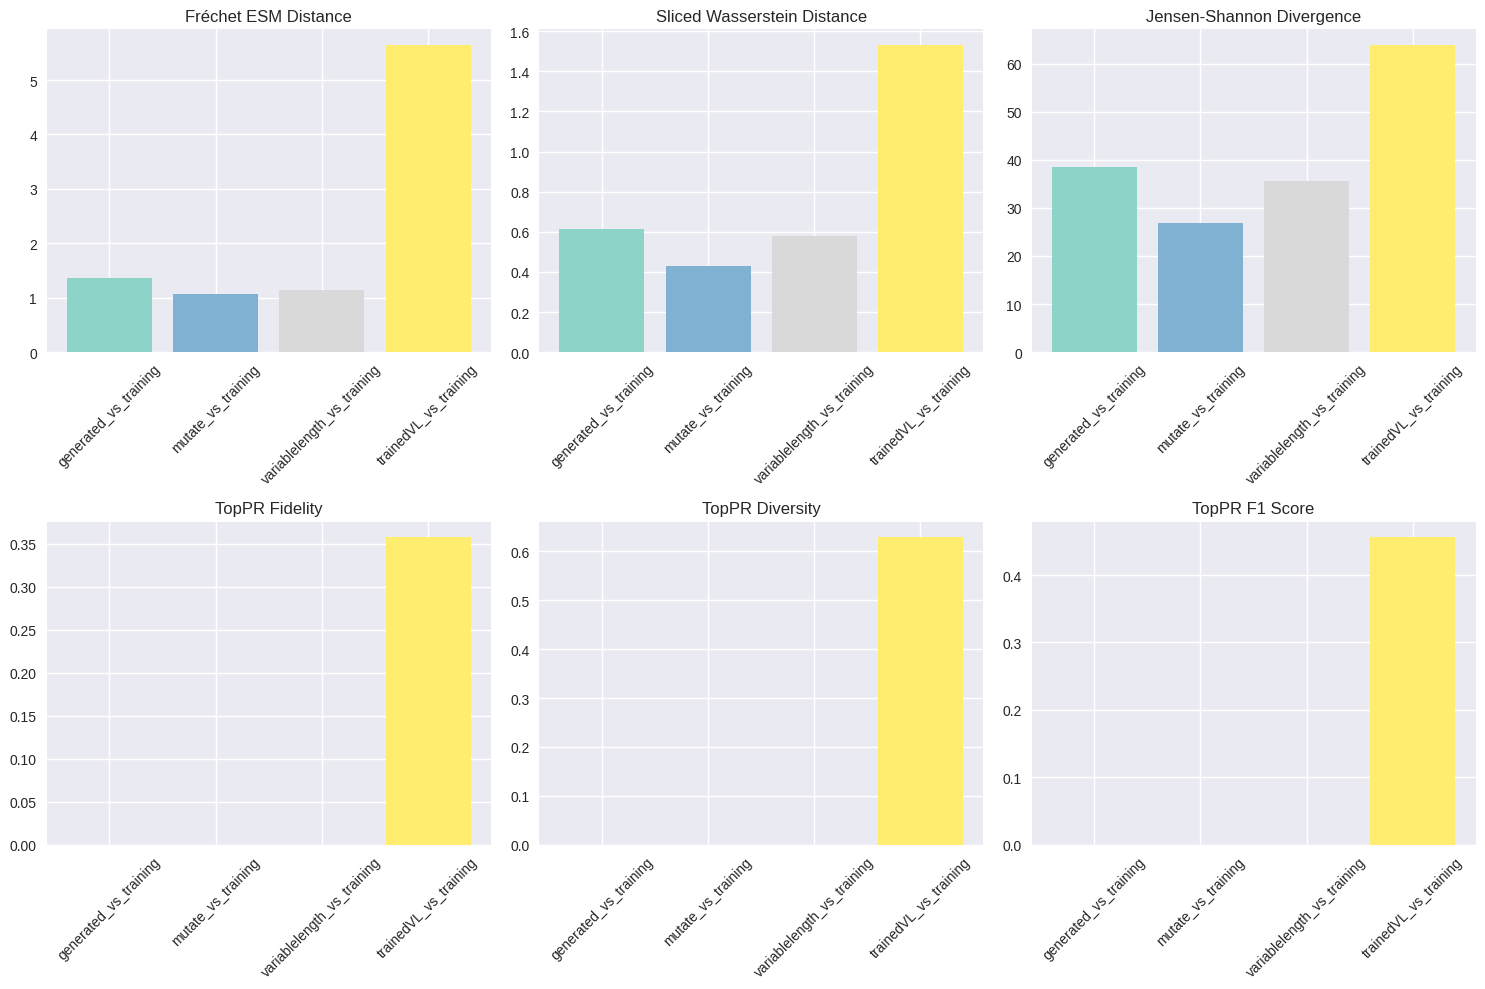

In [11]:

colors = plt.cm.Set3(np.linspace(0, 1, len(datasets)))

frechet_vals = [distribution_results[d]['frechet_esm_distance'] for d in datasets]
sw_vals = [distribution_results[d]['sliced_wasserstein']['distance'] for d in datasets]
js_vals = [0.5 * (distribution_results[d]['kde_kl_divergence']['kl_gen_to_train'] + 
                  distribution_results[d]['kde_kl_divergence']['kl_train_to_gen']) for d in datasets]
fidelity_vals = [distribution_results[d]['toppr']['fidelity'] for d in datasets]
diversity_vals = [distribution_results[d]['toppr']['diversity'] for d in datasets]
f1_vals = [distribution_results[d]['toppr']['f1_score'] for d in datasets]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0,0].bar(datasets, frechet_vals, color=colors)
axes[0,0].set_title('Fréchet ESM Distance')
axes[0,0].tick_params(axis='x', rotation=45)

axes[0,1].bar(datasets, sw_vals, color=colors)
axes[0,1].set_title('Sliced Wasserstein Distance')
axes[0,1].tick_params(axis='x', rotation=45)

axes[0,2].bar(datasets, js_vals, color=colors)
axes[0,2].set_title('Jensen-Shannon Divergence')
axes[0,2].tick_params(axis='x', rotation=45)

axes[1,0].bar(datasets, fidelity_vals, color=colors)
axes[1,0].set_title('TopPR Fidelity')
axes[1,0].tick_params(axis='x', rotation=45)

axes[1,1].bar(datasets, diversity_vals, color=colors)
axes[1,1].set_title('TopPR Diversity')
axes[1,1].tick_params(axis='x', rotation=45)

axes[1,2].bar(datasets, f1_vals, color=colors)
axes[1,2].set_title('TopPR F1 Score')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


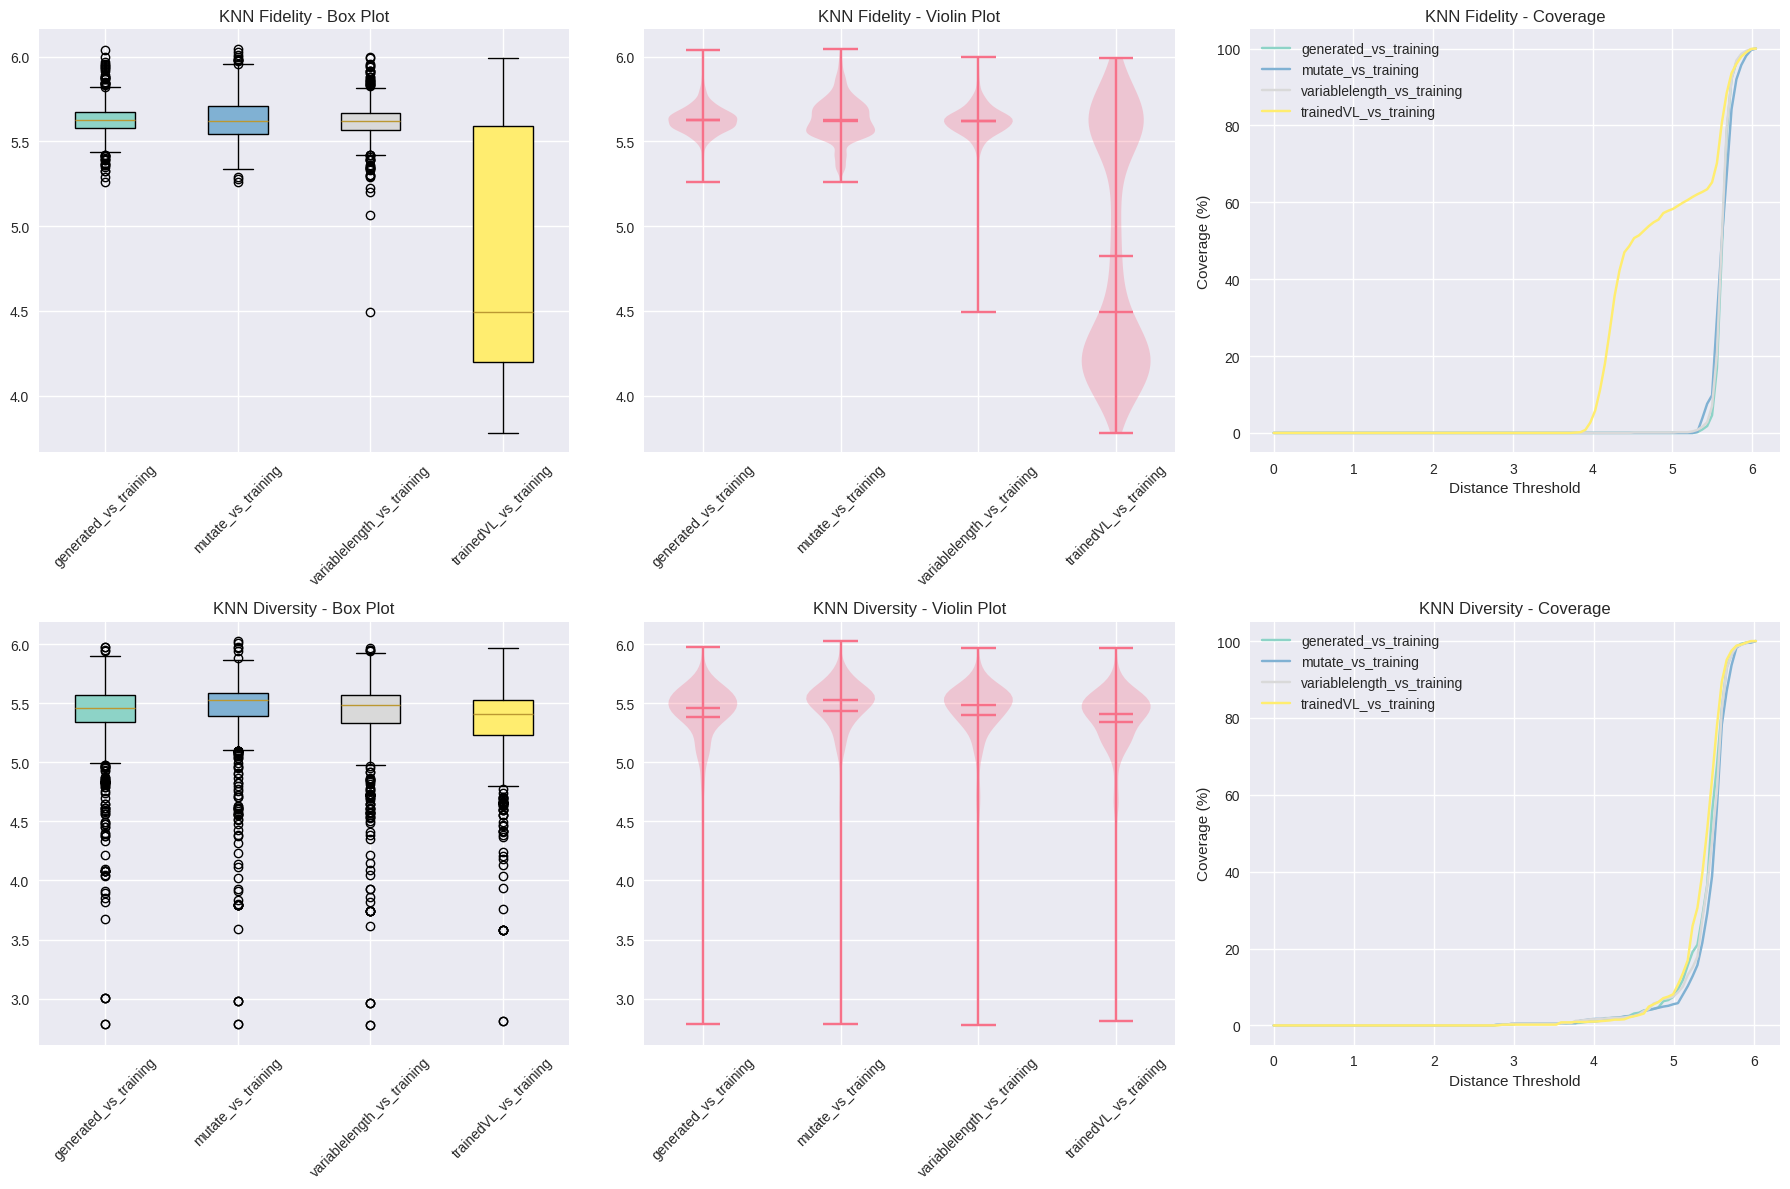

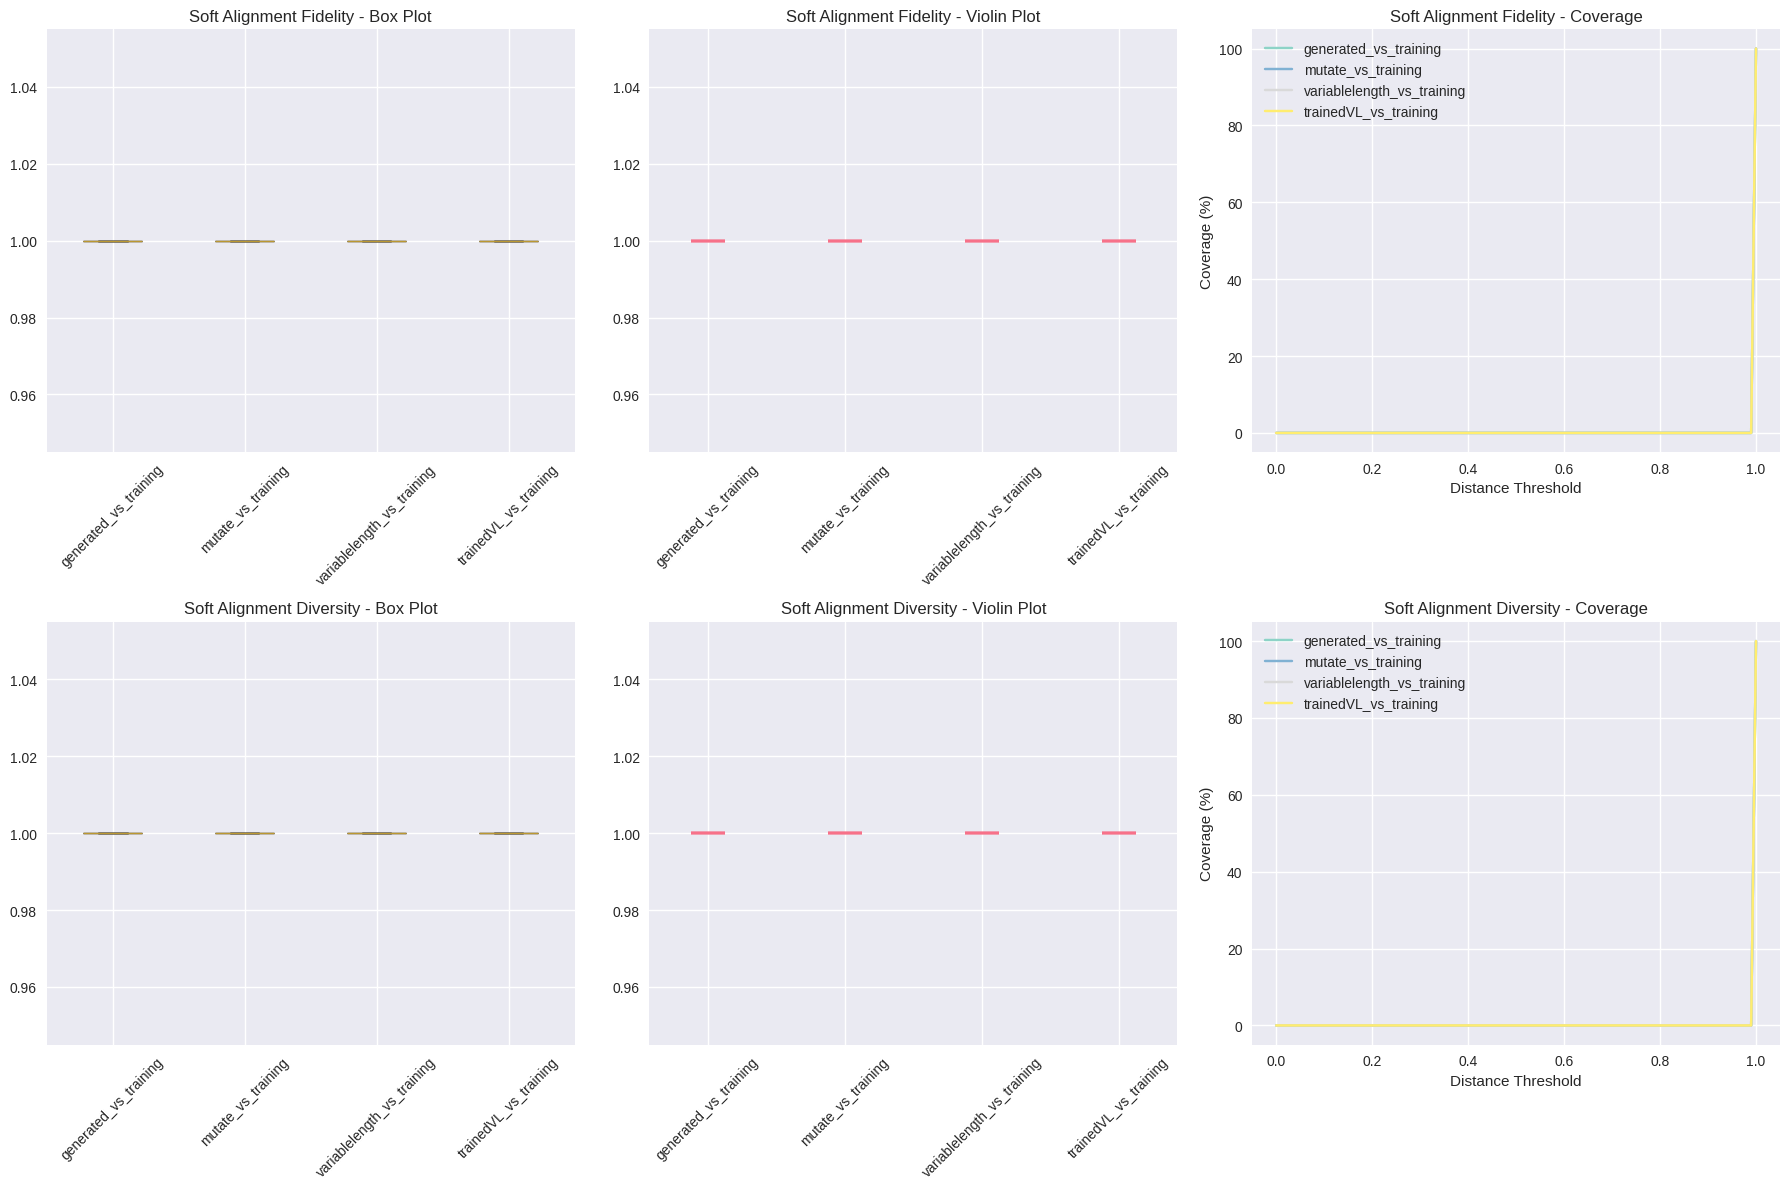

In [12]:

fidelity_dists = [distribution_results[d]['knn_fidelity']['individual_distances'] for d in datasets]
diversity_dists = [distribution_results[d]['knn_diversity']['individual_distances'] for d in datasets]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

bp1 = axes[0,0].boxplot(fidelity_dists, labels=datasets, patch_artist=True)
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
axes[0,0].set_title('KNN Fidelity - Box Plot')
axes[0,0].tick_params(axis='x', rotation=45)

parts1 = axes[0,1].violinplot(fidelity_dists, positions=range(1, len(datasets)+1), showmeans=True, showmedians=True)
axes[0,1].set_xticks(range(1, len(datasets)+1))
axes[0,1].set_xticklabels(datasets, rotation=45)
axes[0,1].set_title('KNN Fidelity - Violin Plot')

thresholds = np.linspace(0, max([max(d) for d in fidelity_dists]), 100)
for i, (dataset, dists) in enumerate(zip(datasets, fidelity_dists)):
    coverage = [sum(1 for d in dists if d <= t) / len(dists) * 100 for t in thresholds]
    axes[0,2].plot(thresholds, coverage, color=colors[i], label=dataset)
axes[0,2].set_title('KNN Fidelity - Coverage')
axes[0,2].set_xlabel('Distance Threshold')
axes[0,2].set_ylabel('Coverage (%)')
axes[0,2].legend()


bp2 = axes[1,0].boxplot(diversity_dists, labels=datasets, patch_artist=True)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
axes[1,0].set_title('KNN Diversity - Box Plot')
axes[1,0].tick_params(axis='x', rotation=45)

parts2 = axes[1,1].violinplot(diversity_dists, positions=range(1, len(datasets)+1), showmeans=True, showmedians=True)
axes[1,1].set_xticks(range(1, len(datasets)+1))
axes[1,1].set_xticklabels(datasets, rotation=45)
axes[1,1].set_title('KNN Diversity - Violin Plot')

thresholds = np.linspace(0, max([max(d) for d in diversity_dists]), 100)
for i, (dataset, dists) in enumerate(zip(datasets, diversity_dists)):
    coverage = [sum(1 for d in dists if d <= t) / len(dists) * 100 for t in thresholds]
    axes[1,2].plot(thresholds, coverage, color=colors[i], label=dataset)
axes[1,2].set_title('KNN Diversity - Coverage')
axes[1,2].set_xlabel('Distance Threshold')
axes[1,2].set_ylabel('Coverage (%)')
axes[1,2].legend()


plt.tight_layout()
plt.show()

fidelity_dists = [[1 - path/100 for path in distribution_results[d]['soft_alignment_fidelity']['individual_paths']] for d in datasets]
diversity_dists = [[1 - path/100 for path in distribution_results[d]['soft_alignment_diversity']['individual_paths']] for d in datasets]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

bp1 = axes[0,0].boxplot(fidelity_dists, labels=datasets, patch_artist=True)
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
axes[0,0].set_title('Soft Alignment Fidelity - Box Plot')
axes[0,0].tick_params(axis='x', rotation=45)

parts1 = axes[0,1].violinplot(fidelity_dists, positions=range(1, len(datasets)+1), showmeans=True, showmedians=True)
axes[0,1].set_xticks(range(1, len(datasets)+1))
axes[0,1].set_xticklabels(datasets, rotation=45)
axes[0,1].set_title('Soft Alignment Fidelity - Violin Plot')

thresholds = np.linspace(0, max([max(d) for d in fidelity_dists]), 100)
for i, (dataset, dists) in enumerate(zip(datasets, fidelity_dists)):
    coverage = [sum(1 for d in dists if d <= t) / len(dists) * 100 for t in thresholds]
    axes[0,2].plot(thresholds, coverage, color=colors[i], label=dataset)
axes[0,2].set_title('Soft Alignment Fidelity - Coverage')
axes[0,2].set_xlabel('Distance Threshold')
axes[0,2].set_ylabel('Coverage (%)')
axes[0,2].legend()

bp2 = axes[1,0].boxplot(diversity_dists, labels=datasets, patch_artist=True)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
axes[1,0].set_title('Soft Alignment Diversity - Box Plot')
axes[1,0].tick_params(axis='x', rotation=45)

parts2 = axes[1,1].violinplot(diversity_dists, positions=range(1, len(datasets)+1), showmeans=True, showmedians=True)
axes[1,1].set_xticks(range(1, len(datasets)+1))
axes[1,1].set_xticklabels(datasets, rotation=45)
axes[1,1].set_title('Soft Alignment Diversity - Violin Plot')

thresholds = np.linspace(0, max([max(d) for d in diversity_dists]), 100)
for i, (dataset, dists) in enumerate(zip(datasets, diversity_dists)):
    coverage = [sum(1 for d in dists if d <= t) / len(dists) * 100 for t in thresholds]
    axes[1,2].plot(thresholds, coverage, color=colors[i], label=dataset)
axes[1,2].set_title('Soft Alignment Diversity - Coverage')
axes[1,2].set_xlabel('Distance Threshold')
axes[1,2].set_ylabel('Coverage (%)')
axes[1,2].legend()

plt.tight_layout()
plt.show()
